## **Training a RaceCar using RL - PPO**
https://gymnasium.farama.org/environments/box2d/car_racing/

### **1. Import dependencies**

In [1]:
# Install swig
# pip install box2d pyglet

In [26]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

### **2. Test Environment**

In [57]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

In [45]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], shape=(96, 96, 3), dtype=uint8),
 {})

In [46]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

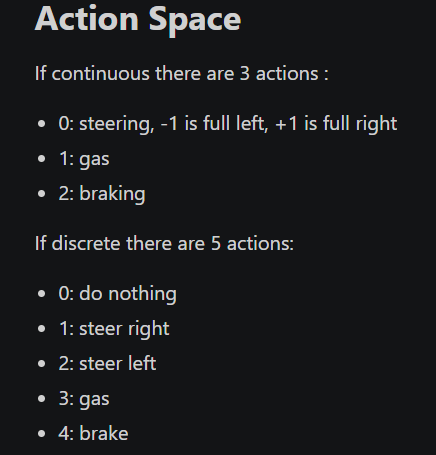

In [47]:
from PIL import Image
from IPython.display import display

image_path = 'Images/action_space_racecar.png'
display(Image.open(image_path))

In [48]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

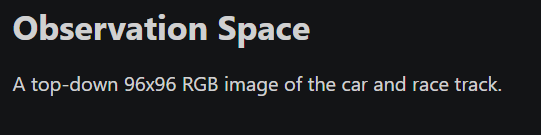

In [49]:
from PIL import Image
from IPython.display import display

image_path = 'Images/observation_space_racecar.png'
display(Image.open(image_path))

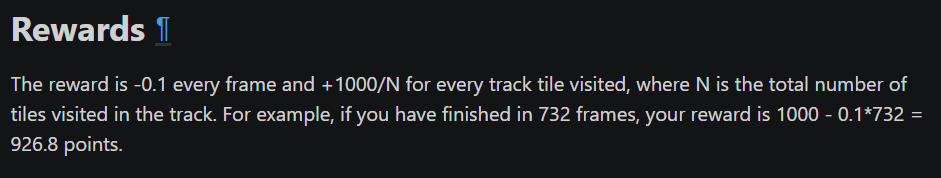

In [50]:
from PIL import Image
from IPython.display import display

image_path = 'Images/reward_racecar.png'
display(Image.open(image_path))

In [51]:
env.render()

In [52]:
env.close()

In [58]:
episodes = 1
for i in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample()
        n_state, reward, truncated, termimated, info = env.step(action)
        score += reward

        # Custom termination: if car goes off-road (green pixels in observation)
        if (n_state[:, :, 1] > 200).sum() > 500:  # crude check: too much green
            terminated = True  

        done = truncated or termimated
    print('Episode:{} Score:{}'.format(i, score))
env.close()

Episode:1 Score:-27.79783393501834


In [17]:
env??

Type:           TimeLimit
String form:    <TimeLimit<OrderEnforcing<PassiveEnvChecker<CarRacing<CarRacing-v3>>>>>
File:           d:\sem 5\ml\package\venv\lib\site-packages\gymnasium\wrappers\common.py
Source:        
class TimeLimit(
    gym.Wrapper[ObsType, ActType, ObsType, ActType], gym.utils.RecordConstructorArgs
):
    """Limits the number of steps for an environment through truncating the environment if a maximum number of timesteps is exceeded.

    If a truncation is not defined inside the environment itself, this is the only place that the truncation signal is issued.
    Critically, this is different from the `terminated` signal that originates from the underlying environment as part of the MDP.
    No vector wrapper exists.

    Example using the TimeLimit wrapper:
        >>> from gymnasium.wrappers import TimeLimit
        >>> from gymnasium.envs.classic_control import CartPoleEnv

        >>> spec = gym.spec("CartPole-v1")
        >>> spec.max_episode_steps
        500
 

### **3. Train Model**

#### Play as Human

In [22]:
# python gymnasium/envs/box2d/car_racing.py
#  python venv/lib/site-packages/gymnasium/envs/box2d/car_racing.py

In [29]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name) # render_mode='human' --> Not given to speed up the training
env = DummyVecEnv([lambda: env])

In [30]:
log_path = os.path.join('Training', 'Logs')
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [31]:
model.learn(total_timesteps=1_000_000)

Logging to Training\Logs\PPO_16
-----------------------------
| time/              |      |
|    fps             | 83   |
|    iterations      | 1    |
|    time_elapsed    | 24   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 79          |
|    iterations           | 2           |
|    time_elapsed         | 51          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009446194 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.24       |
|    explained_variance   | -0.00278    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.215       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0104     |
|    std                  | 0.989       |
|    value_loss           | 0.737       |
--

### **4. Save Model**

In [32]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1MD_CarRacing_Model')

In [33]:
model.save(ppo_path)

In [32]:
model.save(ppo_path)

del model

model = PPO.load(ppo_path, env=env)

Wrapping the env in a VecTransposeImage.


### **5. Evaluate Model**

In [ ]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

ppo_path = os.path.join('Training', 'Saved Models', 'PPO_100k_CarRacing_Model')
model = PPO.load(ppo_path, env=env)

evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(np.float64(380.83622727543116), np.float64(0.0))

## **Training a RaceCar using RL - SAC**

### **1. Import dependencies**

In [24]:
import os
import gymnasium as gym
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor

In [25]:
def make_env():
    def _init():
        env = gym.make("CarRacing-v3")  # no render_mode here (slows training)
        env = Monitor(env)              # logs reward/episode length
        return env
    return _init

In [26]:
num_envs = 8   # adjust based on your CPU
env = SubprocVecEnv([make_env() for _ in range(num_envs)])

In [27]:
log_path = os.path.join("Training", "Logs")

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


### **2. Train Model & Save Model**

In [30]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1M_CarRacing_Model')

model.learn(total_timesteps=1_000_000)
model.save(ppo_path)

Logging to Training\Logs\PPO_11
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -55.6    |
| time/              |          |
|    fps             | 287      |
|    iterations      | 1        |
|    time_elapsed    | 57       |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -52.6        |
| time/                   |              |
|    fps                  | 234          |
|    iterations           | 2            |
|    time_elapsed         | 139          |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0068016495 |
|    clip_fraction        | 0.0762       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.22        |
|    explained_variance   

### **3. Test Model**

In [31]:
test_env = gym.make("CarRacing-v3", render_mode="human")

# Load trained model (PPO or SAC depending on what you trained)
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1M_CarRacing_Model')
model = PPO.load(ppo_path, env=test_env)

obs, info = test_env.reset()
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated

test_env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [76]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

ppo_path = os.path.join('Training', 'Saved Models', 'PPO_1M_CarRacing_Model')
model = PPO.load(ppo_path, env=env)

rew, std = evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

rew,std

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


(np.float64(403.6764726638794), np.float64(0.0))

## **Train for 2M** - OverNight

### **1. Import dependencies**

In [19]:
import os
import gymnasium as gym
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor

In [20]:
def make_env():
    def _init():
        env = gym.make("CarRacing-v3")  # no render_mode here (slows training)
        env = Monitor(env)              # logs reward/episode length
        return env
    return _init

In [21]:
num_envs = 8   # adjust based on your CPU
env = SubprocVecEnv([make_env() for _ in range(num_envs)])

In [22]:
log_path = os.path.join("Training", "Logs")

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


### **2. Train Model & Save Model**

In [23]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_2M_CarRacing_Model')

model.learn(total_timesteps=2_000_000)
model.save(ppo_path)

Logging to Training\Logs\PPO_15


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -55.7    |
| time/              |          |
|    fps             | 392      |
|    iterations      | 1        |
|    time_elapsed    | 41       |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -51.9        |
| time/                   |              |
|    fps                  | 306          |
|    iterations           | 2            |
|    time_elapsed         | 106          |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0060172533 |
|    clip_fraction        | 0.0746       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.23        |
|    explained_variance   | 0.00103      |
|    learning_r

In [25]:
enviroment_name = 'CarRacing-v3'
env = gym.make(enviroment_name, render_mode='human')

ppo_path = os.path.join('Training', 'Saved Models', 'PPO_2M_CarRacing_Model')
model = PPO.load(ppo_path, env=env)

evaluate_policy(model, env, n_eval_episodes=1, render=True)

env.close()

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
